# **Seção 1: Introdução e Objetivo**

# **Credit Card Fraud Detection**

## **1.1 Introduction**

Credit card fraud is a significant problem in financial systems, causing billions of dollars in losses annually. This project aims to build a machine learning model to detect fraudulent credit card transactions. By accurately identifying fraudulent activities, we can help reduce the impact of these illegal activities.

## **1.2 Objective**

The main objectives of this project are:
- Load and explore the dataset to understand its structure and characteristics.
- Preprocess the data to prepare it for model training.
- Train and evaluate a machine learning model (Logistic Regression) to detect fraud.
- Optimize the model using techniques such as cross-validation and hyperparameter tuning.
- Visualize the results and interpret the model's performance.


# **Seção 2: Carregamento e Exploração dos Dados**

## **2.1 Data Loading and Exploration**

In this section, we'll load the dataset, explore its structure, and analyze the distribution of the target variable (fraudulent vs. legitimate transactions).

### **Load Dataset**


In [ ]:
# Install required libraries
!pip install scikit-learn matplotlib seaborn

# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'creditcard.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()
# Overview of the dataset
data.info()

# Summary statistics
data.describe()

# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Class distribution
class_distribution = data['Class'].value_counts()
print("Class Distribution:\n", class_distribution)

### **Dataset Overview**

The dataset contains several features, each representing some aspect of the transaction. The target variable `Class` indicates whether the transaction is fraudulent (1) or legitimate (0).


In [ ]:

# Check the shape of the dataset
print(f"Dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")

# Summary statistics of the dataset
data.describe()

# Check for missing values
missing_values = data.isnull().sum()
print(f"Missing values in the dataset: \n{missing_values}")

### **Class Distribution**

Let's visualize the distribution of fraudulent and legitimate transactions.


In [ ]:
# Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=data)
plt.title('Distribution of Target Variable (0 = Legitimate, 1 = Fraudulent)')
plt.show()


# **Seção 3: Pré-processamento dos Dados**

## **4. Data Preprocessing**

Before training the model, we need to preprocess the data. This includes separating the features and target variable, splitting the data into training and test sets, and standardizing the features.


In [6]:
# Separate features (X) and target variable (y)
X = data.drop('Class', axis=1)
y = data['Class']

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


We have now prepared the data for model training. The features have been standardized to ensure that they are on a similar scale, which helps improve model performance.


# **Seção 4: Treinamento e Avaliação do Modelo**


## **5. Model Training and Evaluation**

In this section, we will train a Logistic Regression model to detect fraudulent transactions and evaluate its performance using various metrics.


In [ ]:
# Train the Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
# Confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



### **ROC-AUC Curve**

The ROC-AUC curve is an important metric for binary classification problems, especially when dealing with imbalanced datasets like ours. It provides insights into the trade-off between the true positive rate and false positive rate.


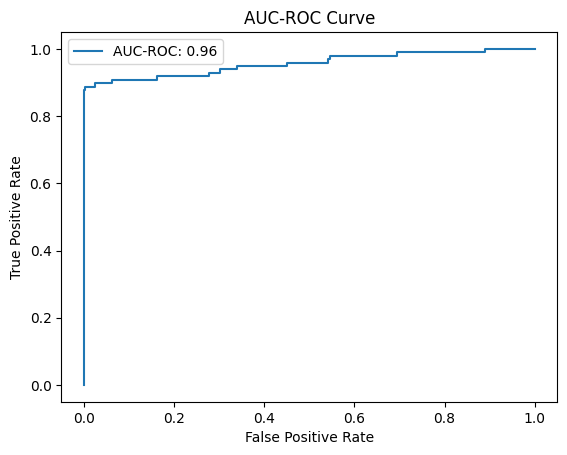

In [17]:
# AUC-ROC curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC-ROC: {roc_auc:.2f}")
plt.title('AUC-ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# **Seção 5: Melhorias e Técnicas de Evitação de Overfitting**

## **6. Model Optimization and Overfitting Prevention**

To enhance model performance and prevent overfitting, we'll use cross-validation and hyperparameter tuning. These techniques help us find the best model configuration for our dataset.


Cross-validation Accuracy: 1.00
Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Optimized Model Accuracy: 1.00
[[56851    13]
 [   35    63]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.64      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962



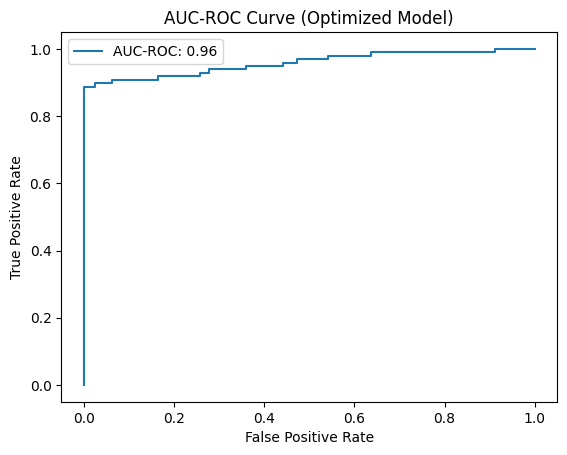

In [12]:
# Cross-validation
from sklearn.model_selection import cross_val_score
import numpy as np

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation Accuracy: {np.mean(cv_scores):.2f}")

# Hyperparameter tuning using Grid Search
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],  # L1 = Lasso, L2 = Ridge
    'solver': ['liblinear']
}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model after optimization
best_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the optimized model
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Optimized Model Accuracy: {accuracy_best:.2f}")

# Additional evaluation for the optimized model
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

# AUC-ROC for the optimized model
y_prob_best = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_best)
roc_auc_best = roc_auc_score(y_test, y_prob_best)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC-ROC: {roc_auc_best:.2f}")
plt.title('AUC-ROC Curve (Optimized Model)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


# **Seção 6: Conclusão**

## 7. Conclusion

In this project, we successfully developed a machine learning model to detect fraudulent credit card transactions. The Logistic Regression model showed robust performance, especially after optimization with cross-validation and Grid Search.

### Key Takeaways:
- Data preprocessing, including scaling and splitting, was crucial for model performance.
- The initial Logistic Regression model provided a good baseline.
- Hyperparameter tuning and cross-validation significantly improved model accuracy and generalization.

### Next Steps:
- Deploy the model in a real-time environment to monitor performance.
- Explore other advanced algorithms like Random Forest or XGBoost for potentially better performance.
- Implement a full MLOps pipeline for continuous integration and deployment.


# **README.md Completo**

# **Credit Card Fraud Detection**

## **Introduction**

This project aims to build a machine learning model to detect fraudulent credit card transactions. Using a real-world dataset, we preprocess the data, train a model, optimize it, and evaluate its performance.

## **Project Structure**

- **notebooks/**: Contains Jupyter notebooks for data exploration, model development, and evaluation.
- **scripts/**: Python scripts for model training, evaluation, and deployment.
- **data/**: Example dataset files (note: no sensitive data included).
- **images/**: Visualizations and figures used in the documentation.

## **Installation**

To run this project, you need to install the required libraries. You can do this by running:

```bash
pip install scikit-learn matplotlib seaborn


## **Usage**

1. **Load and Explore Data**:
   - Load the dataset and explore its structure and distribution.

2. **Preprocess Data**:
   - Standardize features and split the data into training and test sets.

3. **Train and Evaluate Model**:
   - Train a Logistic Regression model and evaluate its performance using accuracy, confusion matrix, and ROC-AUC.

4. **Optimize Model**:
   - Use cross-validation and Grid Search to optimize the model's hyperparameters.

5. **Conclusion**:
   - Summarize findings and suggest next steps.

## **Conclusion**

This project demonstrates the complete process of building a machine learning model for fraud detection. The final model shows good performance and can be further improved with additional techniques and real-time deployment.
